In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("cars_data.csv")
data.head()

,Make,Model,Nickname,Car Gender,Buyer Gender,Buyer Age,Buzzword,Country,City,Dealer Latitude,Dealer Longitude,Color,New Car,Purchase Date,Sale Price,Discount,Resell Price,5-yr Depreciation,Top Speed,0-60 Time
0,Suzuki,Vitara,Philippine,Female,Female,51,User-friendly,Belgium,Antwerpen,51.247239,4.440346,Yellow,False,19/07/2009,54806.14,0.2467,33858.32,0.13,200.9,11.5
1,Honda,S2000,Henrik,Male,Male,30,analyzing,China,Jinhu,33.025433,119.020584,Crimson,False,26/10/2015,51826.30,0.3147,2989.28,0.02,158.5,8.8
2,BMW,Z4,Lebbie,Male,Female,54,software,China,Gemo,30.916207,121.677640,Khaki,False,28/03/2010,82929.14,0.5414,35049.16,0.24,149.5,14.4
3,Toyota,Tacoma,Jefferey,Female,Male,68,monitoring,Portugal,Queluz de Baixo,38.745168,-9.267087,Puce,False,07/05/2008,56928.66,0.0850,8236.15,0.20,153.3,11.5
4,Ford,Festiva,Glendon,Female,Male,70,Sharable,Latvia,Jaunpils,56.729980,23.016588,Yellow,False,01/06/2008,77201.26,0.1642,32765.76,0.18,122.0,14.9


In [3]:
data.dtypes

Make                  object
Model                 object
Nickname              object
Car Gender            object
Buyer Gender          object
Buyer Age              int64
Buzzword              object
Country               object
City                  object
Dealer Latitude      float64
Dealer Longitude     float64
Color                 object
New Car                 bool
Purchase Date         object
Sale Price           float64
Discount             float64
Resell Price         float64
5-yr Depreciation    float64
Top Speed            float64
0-60 Time            float64
dtype: object

In [4]:
data.columns

Index(['Make', 'Model', 'Nickname', 'Car Gender', 'Buyer Gender', 'Buyer Age',
       'Buzzword', 'Country', 'City', 'Dealer Latitude', 'Dealer Longitude',
       'Color', 'New Car', 'Purchase Date', 'Sale Price', 'Discount',
       'Resell Price', '5-yr Depreciation', 'Top Speed', '0-60 Time'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               10000 non-null  object 
 1   Model              10000 non-null  object 
 2   Nickname           10000 non-null  object 
 3   Car Gender         10000 non-null  object 
 4   Buyer Gender       10000 non-null  object 
 5   Buyer Age          10000 non-null  int64  
 6   Buzzword           10000 non-null  object 
 7   Country            10000 non-null  object 
 8   City               10000 non-null  object 
 9   Dealer Latitude    10000 non-null  float64
 10  Dealer Longitude   10000 non-null  float64
 11  Color              10000 non-null  object 
 12  New Car            10000 non-null  bool   
 13  Purchase Date      10000 non-null  object 
 14  Sale Price         10000 non-null  float64
 15  Discount           10000 non-null  float64
 16  Resell Price       1000

In [6]:
data.shape

(10000, 20)

In [7]:
data.describe()

,Buyer Age,Dealer Latitude,Dealer Longitude,Sale Price,Discount,Resell Price,5-yr Depreciation,Top Speed,0-60 Time
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,47.762100,24.820088,43.878248,55350.799983,0.350310,25873.349305,0.130596,184.903480,8.471420
std,16.139862,24.585875,70.985736,25888.683650,0.201970,13844.768112,0.069593,37.528707,3.742613
min,20.000000,-53.163833,-178.165510,10003.760000,0.000100,2000.840000,0.010000,120.000000,2.000000
25%,34.000000,7.442378,4.400811,33254.517500,0.177500,13853.507500,0.070000,152.500000,5.200000
50%,48.000000,31.049994,38.156212,55629.770000,0.350900,25967.430000,0.130000,185.500000,8.500000
75%,62.000000,44.351935,112.252192,77770.950000,0.522625,37875.417500,0.190000,217.700000,11.700000
max,75.000000,71.963470,179.350460,99997.650000,0.700000,49997.050000,0.250000,250.000000,15.000000


### EDA

#### CAR MANUFACTURER COUNT

In [8]:
data["Make"].nunique()

75

In [9]:
data["Make"].value_counts().reset_index()

,Make,count
0,Ford,864
1,Chevrolet,800
2,Dodge,500
3,GMC,454
4,Toyota,444
...,...,...
70,Hillman,1
71,Corbin,1
72,MG,1
73,Shelby,1


Text(0.5, 1.0, 'Count of Cars by Manufacturer')

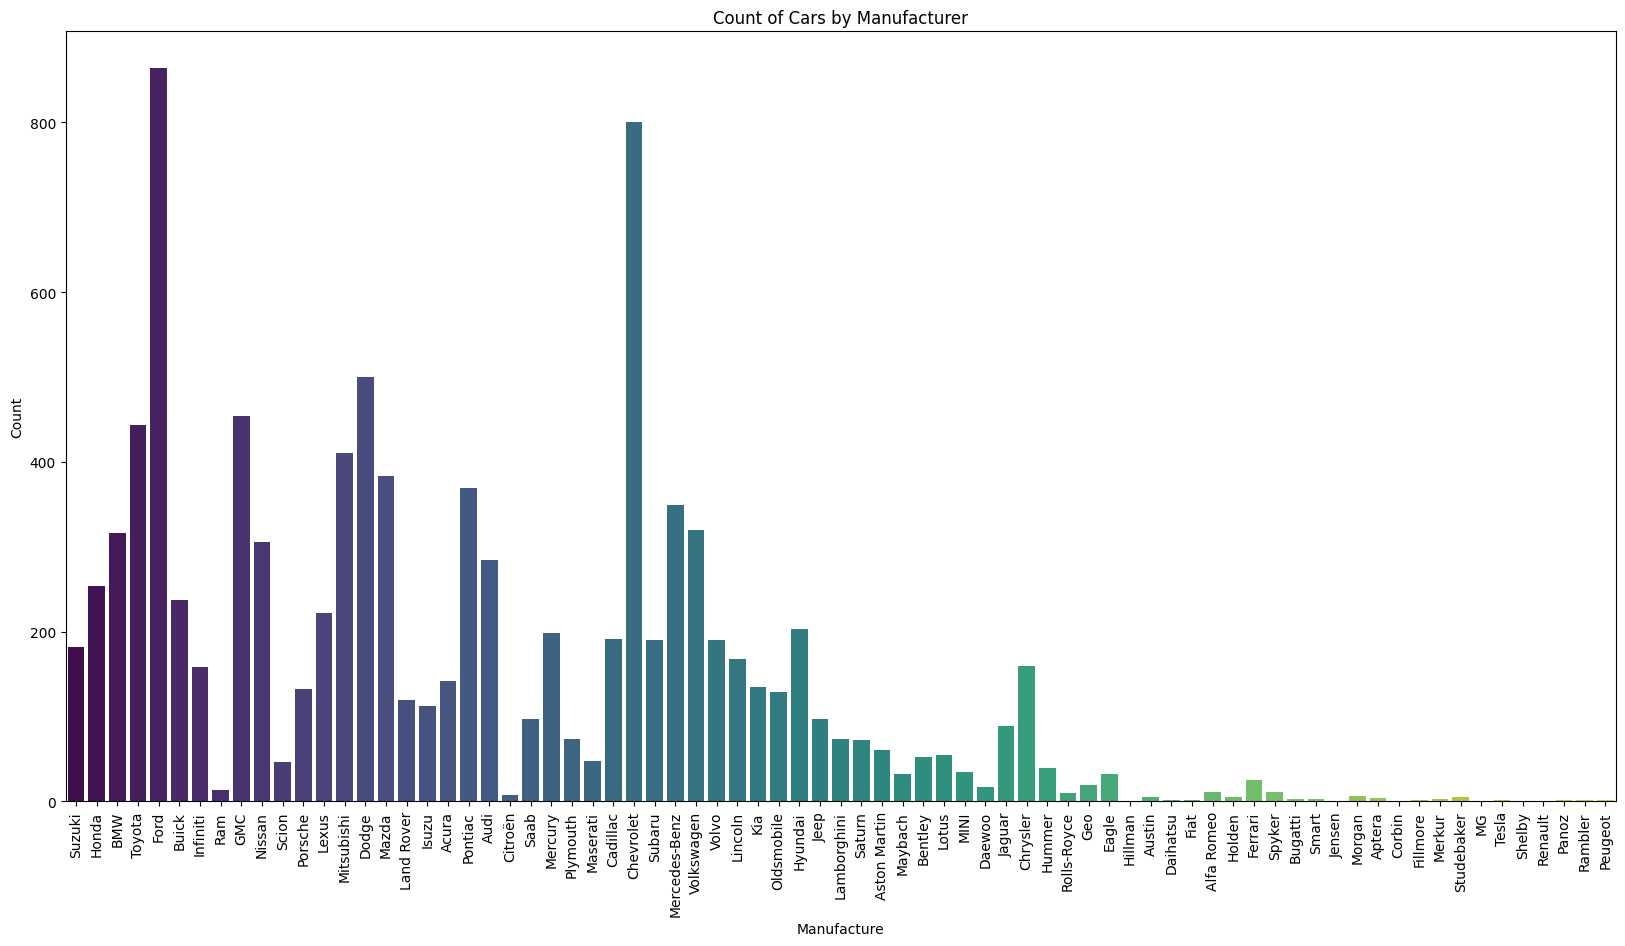

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x="Make",hue="Make",data=data,palette="viridis")
plt.xlabel("Manufacture")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Count of Cars by Manufacturer")

##### Top 5 manufature

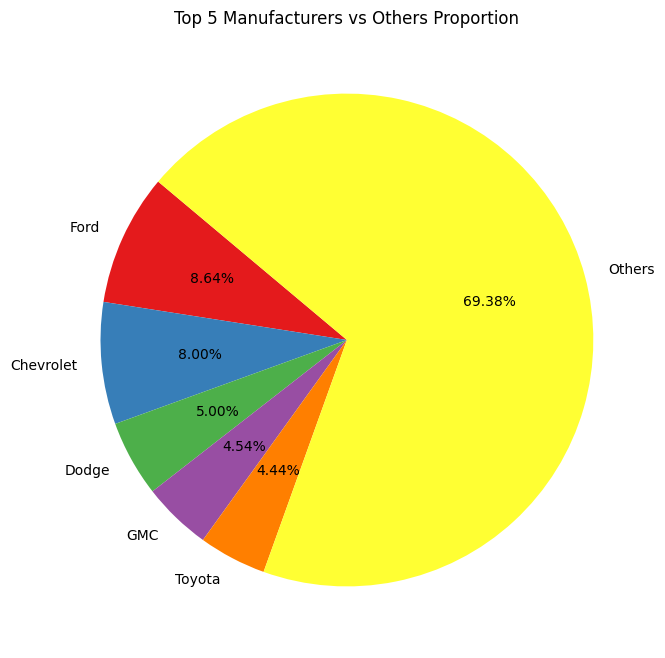

In [11]:
top_five=data["Make"].value_counts().head(5)
others=data["Make"].value_counts().sum()-top_five.sum()
counts=list(top_five.values)+[others]
labels=list(top_five.index)+["Others"]
plt.figure(figsize=(8,8))
plt.pie(counts, labels=labels,autopct="%1.2f%%",startangle=140, colors=sns.color_palette('Set1'))
plt.title('Top 5 Manufacturers vs Others Proportion')
plt.show()

* Overall 75 manufacture are there
* In this the top manufacture is Ford and then Chevrolet

#### BUYER AGE DISTRIBUTION

In [12]:
data["Buyer Age"].max()

75

In [13]:
data["Buyer Age"].min()

20

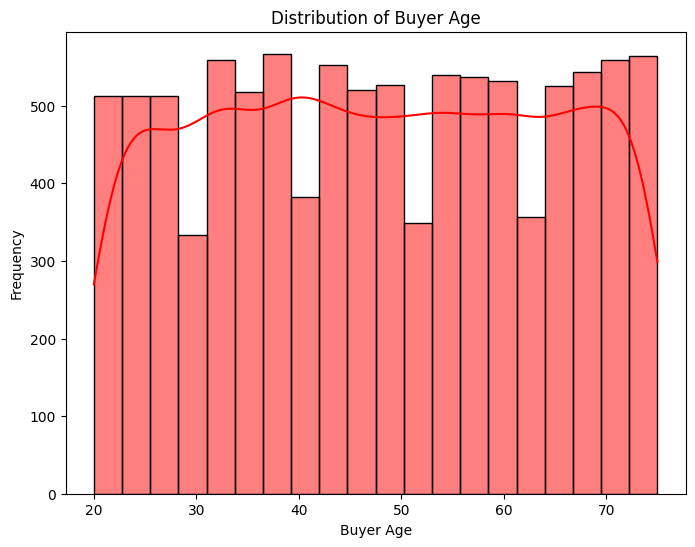

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(data["Buyer Age"],bins=20,kde=True, color="red")
plt.xlabel("Buyer Age")
plt.ylabel("Frequency")
plt.title("Distribution of Buyer Age")
plt.show()

* From this we can understand that age is distributed in between 20 and 75
* Almost age is equally distributed

#### Top Manufacturing Country

In [15]:
data["Country"].nunique()

199

In [16]:
country=data["Country"].value_counts().reset_index()
top_country=country.head(10)
top_country

,Country,count
0,China,1849
1,Indonesia,1045
2,Russia,577
3,Philippines,507
4,Brazil,406
5,Poland,344
6,France,301
7,Portugal,300
8,Sweden,264
9,United States,248


Text(0.5, 1.0, 'Top 10 countries on Car manufacturing')

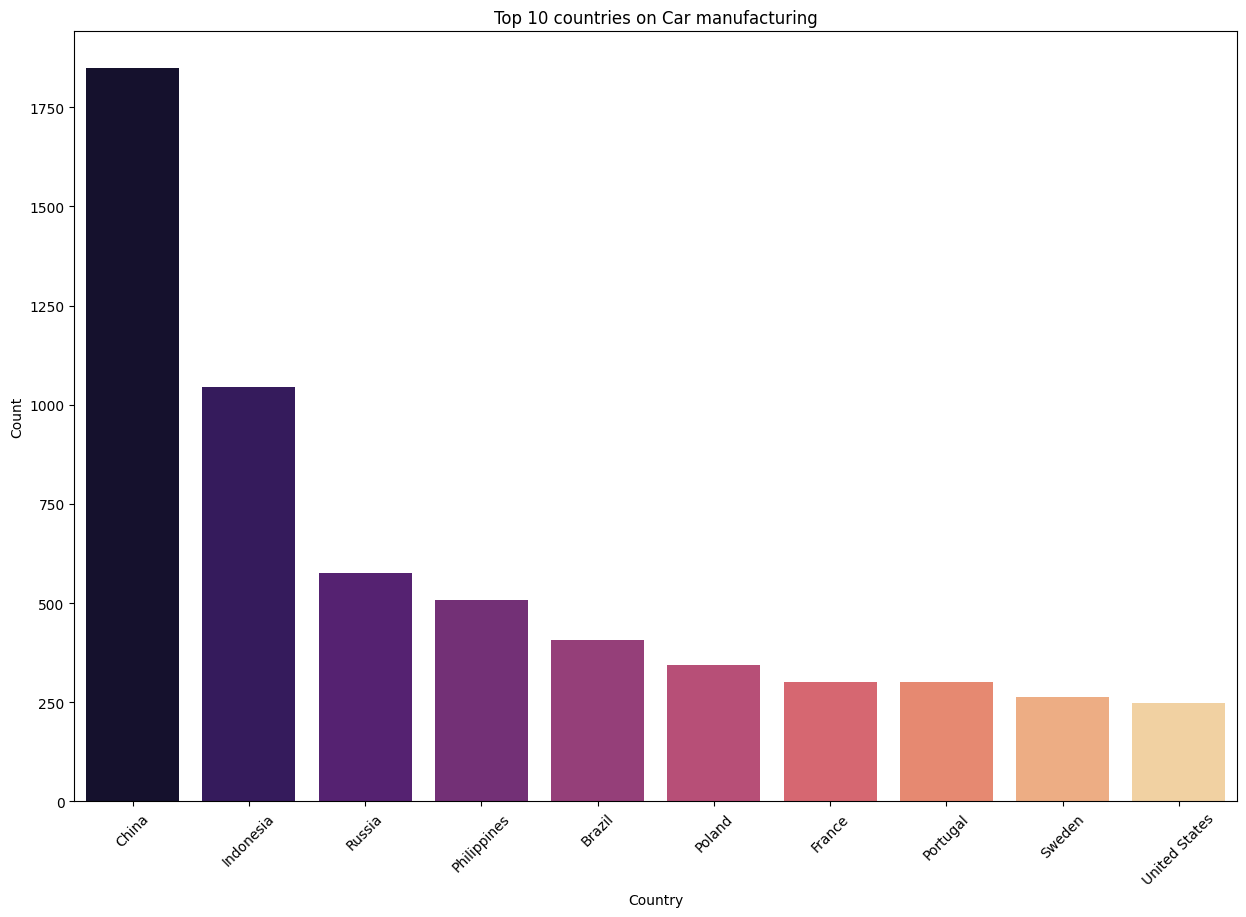

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(x="Country",y="count",data=top_country,hue="Country",palette="magma")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Top 10 countries on Car manufacturing")

* From this we can understand top car manufacturing country is china then indonesia
* Over 199 countries are manufacturing cars

#### Color Vs Cars

In [18]:
data["Color"].nunique()

19

In [19]:
data["Color"].value_counts().reset_index()

,Color,count
0,Mauv,577
1,Yellow,564
2,Orange,550
3,Teal,545
4,Turquoise,545
5,Violet,542
6,Crimson,541
7,Pink,537
8,Goldenrod,530
9,Maroon,529


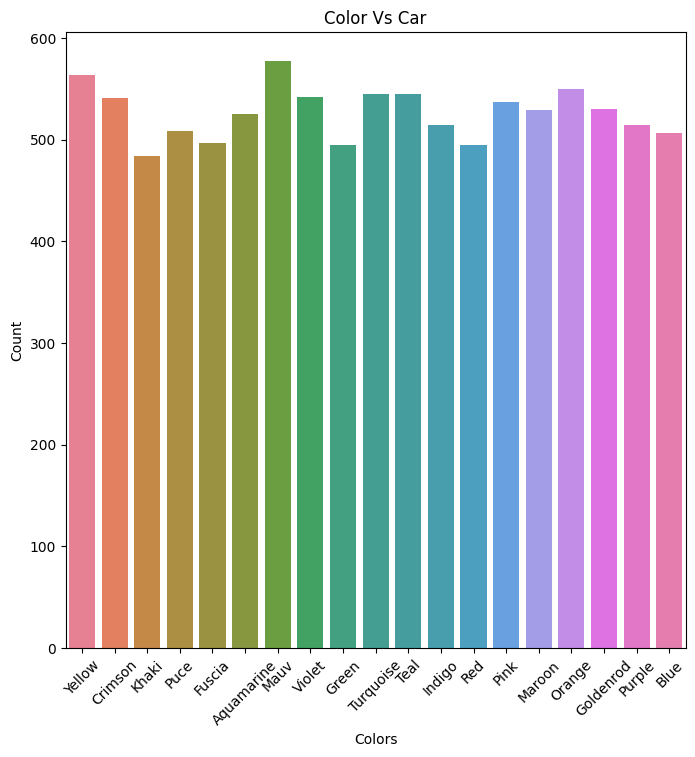

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(x="Color",data=data,hue="Color")
plt.xlabel("Colors")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Color Vs Car")
plt.show()

* Total of 19 color variant is there
* Almost every color alomost same number of car but the "Mauv"

#### Average Sale price and Resell price for each model

In [21]:
data['Model'].nunique()

957

In [22]:
avg_of_model=data.groupby(["Model","Make"])[["Sale Price","Resell Price"]].mean().reset_index()
avg_of_model

,Model,Make,Sale Price,Resell Price
0,09-Mar,Saab,49931.754000,21920.674400
1,09-May,Saab,42246.832000,22488.681000
2,1 Series,BMW,78639.726000,15452.632000
3,100,Audi,44854.357143,23798.068571
4,1000,Pontiac,59364.511429,24942.385714
...,...,...,...,...
984,riolet,Volkswagen,56670.666667,21647.883333
985,tC,Scion,59192.203571,17974.535000
986,xA,Scion,35160.790000,26259.072500
987,xB,Scion,51111.382000,23482.705333


In [23]:
avg_of_model["Car name"]=avg_of_model["Make"]+"-"+avg_of_model["Model"]
avg_of_model=avg_of_model.drop(["Make","Model"], axis=1)
avg_of_model

,Sale Price,Resell Price,Car name
0,49931.754000,21920.674400,Saab-09-Mar
1,42246.832000,22488.681000,Saab-09-May
2,78639.726000,15452.632000,BMW-1 Series
3,44854.357143,23798.068571,Audi-100
4,59364.511429,24942.385714,Pontiac-1000
...,...,...,...
984,56670.666667,21647.883333,Volkswagen-riolet
985,59192.203571,17974.535000,Scion-tC
986,35160.790000,26259.072500,Scion-xA
987,51111.382000,23482.705333,Scion-xB


In [24]:
avg_of_model=avg_of_model[["Car name","Sale Price","Resell Price"]]
avg_of_model.head(10)

,Car name,Sale Price,Resell Price
0,Saab-09-Mar,49931.754000,21920.674400
1,Saab-09-May,42246.832000,22488.681000
2,BMW-1 Series,78639.726000,15452.632000
3,Audi-100,44854.357143,23798.068571
4,Pontiac-1000,59364.511429,24942.385714
5,Chevrolet-1500,47563.155714,20697.007143
6,GMC-1500,59563.415556,32052.203333
7,Ram-1500,36252.722500,14980.865000
8,GMC-1500 Club Coupe,54717.644167,32589.360833
9,Alfa Romeo-164,57513.314286,29827.680000


In [25]:
avg_of_model.tail(10)

,Car name,Sale Price,Resell Price
979,Mitsubishi-i-MiEV,81999.650000,26412.235000
980,Isuzu-i-Series,45824.065000,24864.435000
981,Scion-iQ,74486.440000,12498.330000
982,Volkswagen-rio,66717.064286,24435.660000
983,Audi-riolet,32392.234000,22002.584000
984,Volkswagen-riolet,56670.666667,21647.883333
985,Scion-tC,59192.203571,17974.535000
986,Scion-xA,35160.790000,26259.072500
987,Scion-xB,51111.382000,23482.705333
988,Scion-xD,57067.336000,31101.772000


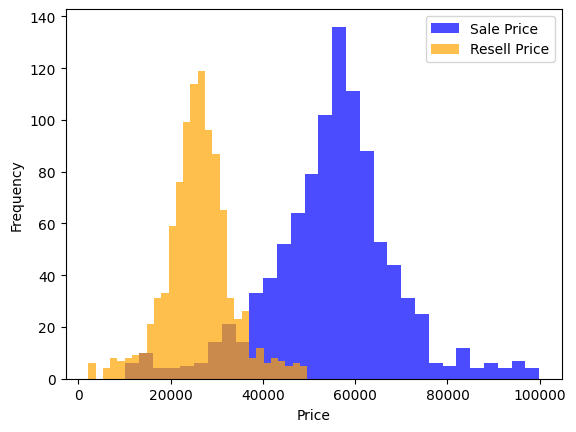

In [26]:
plt.hist(avg_of_model["Sale Price"],bins=30,color="blue",alpha=0.7,label="Sale Price")
plt.hist(avg_of_model["Resell Price"],bins=30, color="orange",alpha=0.7,label="Resell Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

* About 957 model cars are there
* Sale price distributed in between 10000 to 100000, comparitively it is greater than resell value and mostly concentrated around 60000
* Resell price distributrd in between 1000 to 50000, comparitively it is less than sale price and mostly concentrated in 20000 to 30000

In [27]:
top_five_sale_price_car=avg_of_model.sort_values(by="Sale Price",ascending=False).head(5)
top_five_sale_price_car

,Car name,Sale Price,Resell Price
585,Hillman-Minx Magnificent,99857.73,46868.52
721,Lamborghini-Reventón,99723.26,34140.42
588,Ford-Model T,97540.48,32021.97
161,Chevrolet-Bel Air,97201.15,16112.50
890,Pontiac-Turbo Firefly,96427.04,9649.84


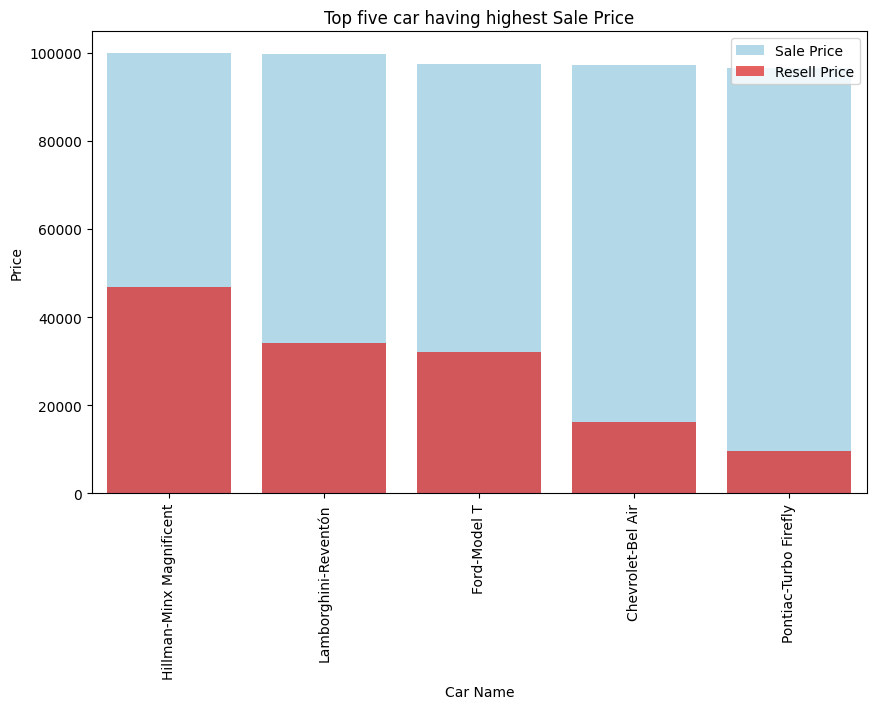

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x="Car name",y="Sale Price",data=top_five_sale_price_car, label="Sale Price",color="skyblue",alpha=0.7)
sns.barplot(x="Car name",y="Resell Price",data=top_five_sale_price_car,label="Resell Price",color="red",alpha=0.7)
plt.xlabel("Car Name")
plt.ylabel("Price")
plt.title("Top five car having highest Sale Price")
plt.legend()
plt.xticks(rotation=90)
plt.show()

* Hilman's Minx Magnificent model has the highest sale price that is 99857.73
* In this top five car having highest sale price , the resale value is very low

In [29]:
top_five_resell_price_car=avg_of_model.sort_values(by="Resell Price",ascending=False).head(5)
top_five_resell_price_car

,Car name,Sale Price,Resell Price
463,Hummer-H2 SUT,10180.26,49635.85
181,Spyker-C8 Laviolette,28301.96,49386.75
430,Volkswagen-GLI,63614.72,49010.84
477,Infiniti-IPL G,48585.13,48411.59
154,Mazda-B2000,12396.47,48139.98


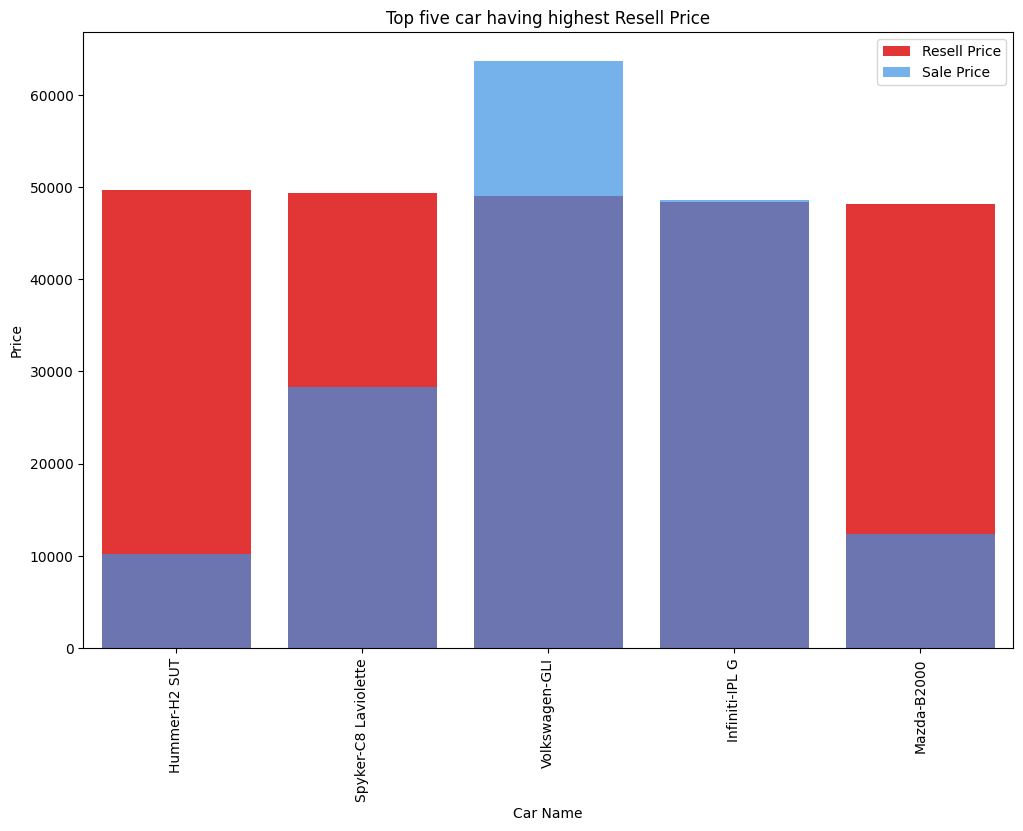

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x="Car name",y="Resell Price",data=top_five_resell_price_car, label="Resell Price",color="red",alpha=0.9)
sns.barplot(x="Car name",y="Sale Price",data=top_five_resell_price_car,label="Sale Price",color="dodgerblue",alpha=0.7)
plt.xlabel("Car Name")
plt.ylabel("Price")
plt.title("Top five car having highest Resell Price")
plt.legend()
plt.xticks(rotation=90)
plt.show()

* Hummer's H2 SUT model has the highest resale price that is 49635.85 and the resell price of this is 5 times greater than sale price
* From this 5 cars we can see 3 of them have resale price than sale price

#### Cars with higher Resell price than Sale price

In [31]:
cars_higher_resell_price=avg_of_model[avg_of_model["Resell Price"]>avg_of_model["Sale Price"]]
cars_higher_resell_price

,Car name,Sale Price,Resell Price
20,Ram-2500,26742.505000,30496.965000
29,Mercedes-Benz-300D,29651.350000,41447.380000
57,Fiat-500,20151.680000,36026.480000
71,Ferrari-599 GTB Fiorano,23081.397500,28568.907500
97,Porsche-914,37981.790000,46238.750000
134,Saturn-Astra,32059.143333,34542.153333
144,Lamborghini-Aventador,14321.835000,30450.640000
154,Mazda-B2000,12396.470000,48139.980000
155,Mazda-B2500,15500.070000,20175.470000
181,Spyker-C8 Laviolette,28301.960000,49386.750000


In [32]:
len(cars_higher_resell_price)

40

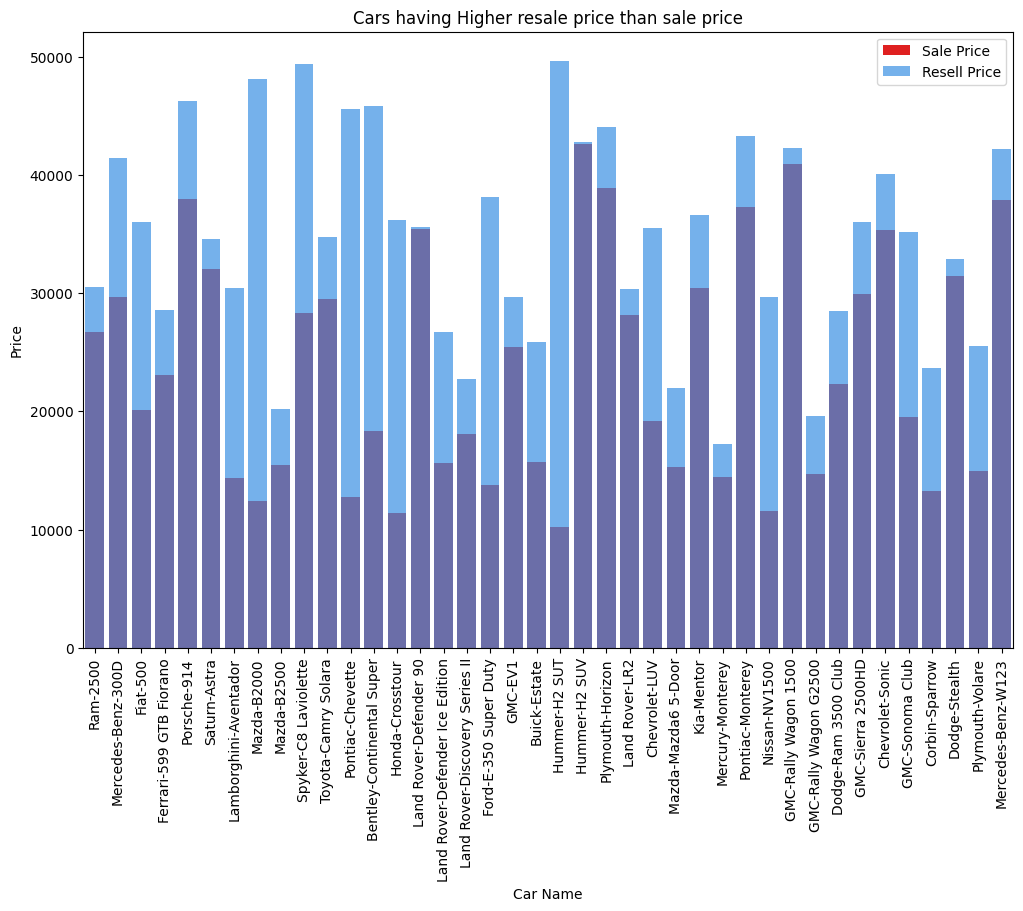

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x="Car name",y="Sale Price",data=cars_higher_resell_price,label="Sale Price",color="red")
sns.barplot(x="Car name",y="Resell Price",data=cars_higher_resell_price,label="Resell Price",alpha=0.7,color="dodgerblue")
plt.xlabel("Car Name")
plt.ylabel("Price")
plt.title("Cars having Higher resale price than sale price")
plt.legend()
plt.xticks(rotation=90)
plt.show()

* 40 cars have higher resale price than the sale price

#### Company wise Price

In [34]:
company_price=data.groupby("Make")[["Resell Price","Sale Price"]].mean().reset_index()
company_price

,Make,Resell Price,Sale Price
0,Acura,26898.640423,55301.872394
1,Alfa Romeo,33532.719091,53958.793636
2,Aptera,33632.422500,65626.802500
3,Aston Martin,22602.120820,56729.934098
4,Audi,27763.395088,57550.239333
...,...,...,...
70,Suzuki,28731.977033,55246.093132
71,Tesla,17163.160000,57060.865000
72,Toyota,25410.678108,54774.989032
73,Volkswagen,25860.561781,55862.681437


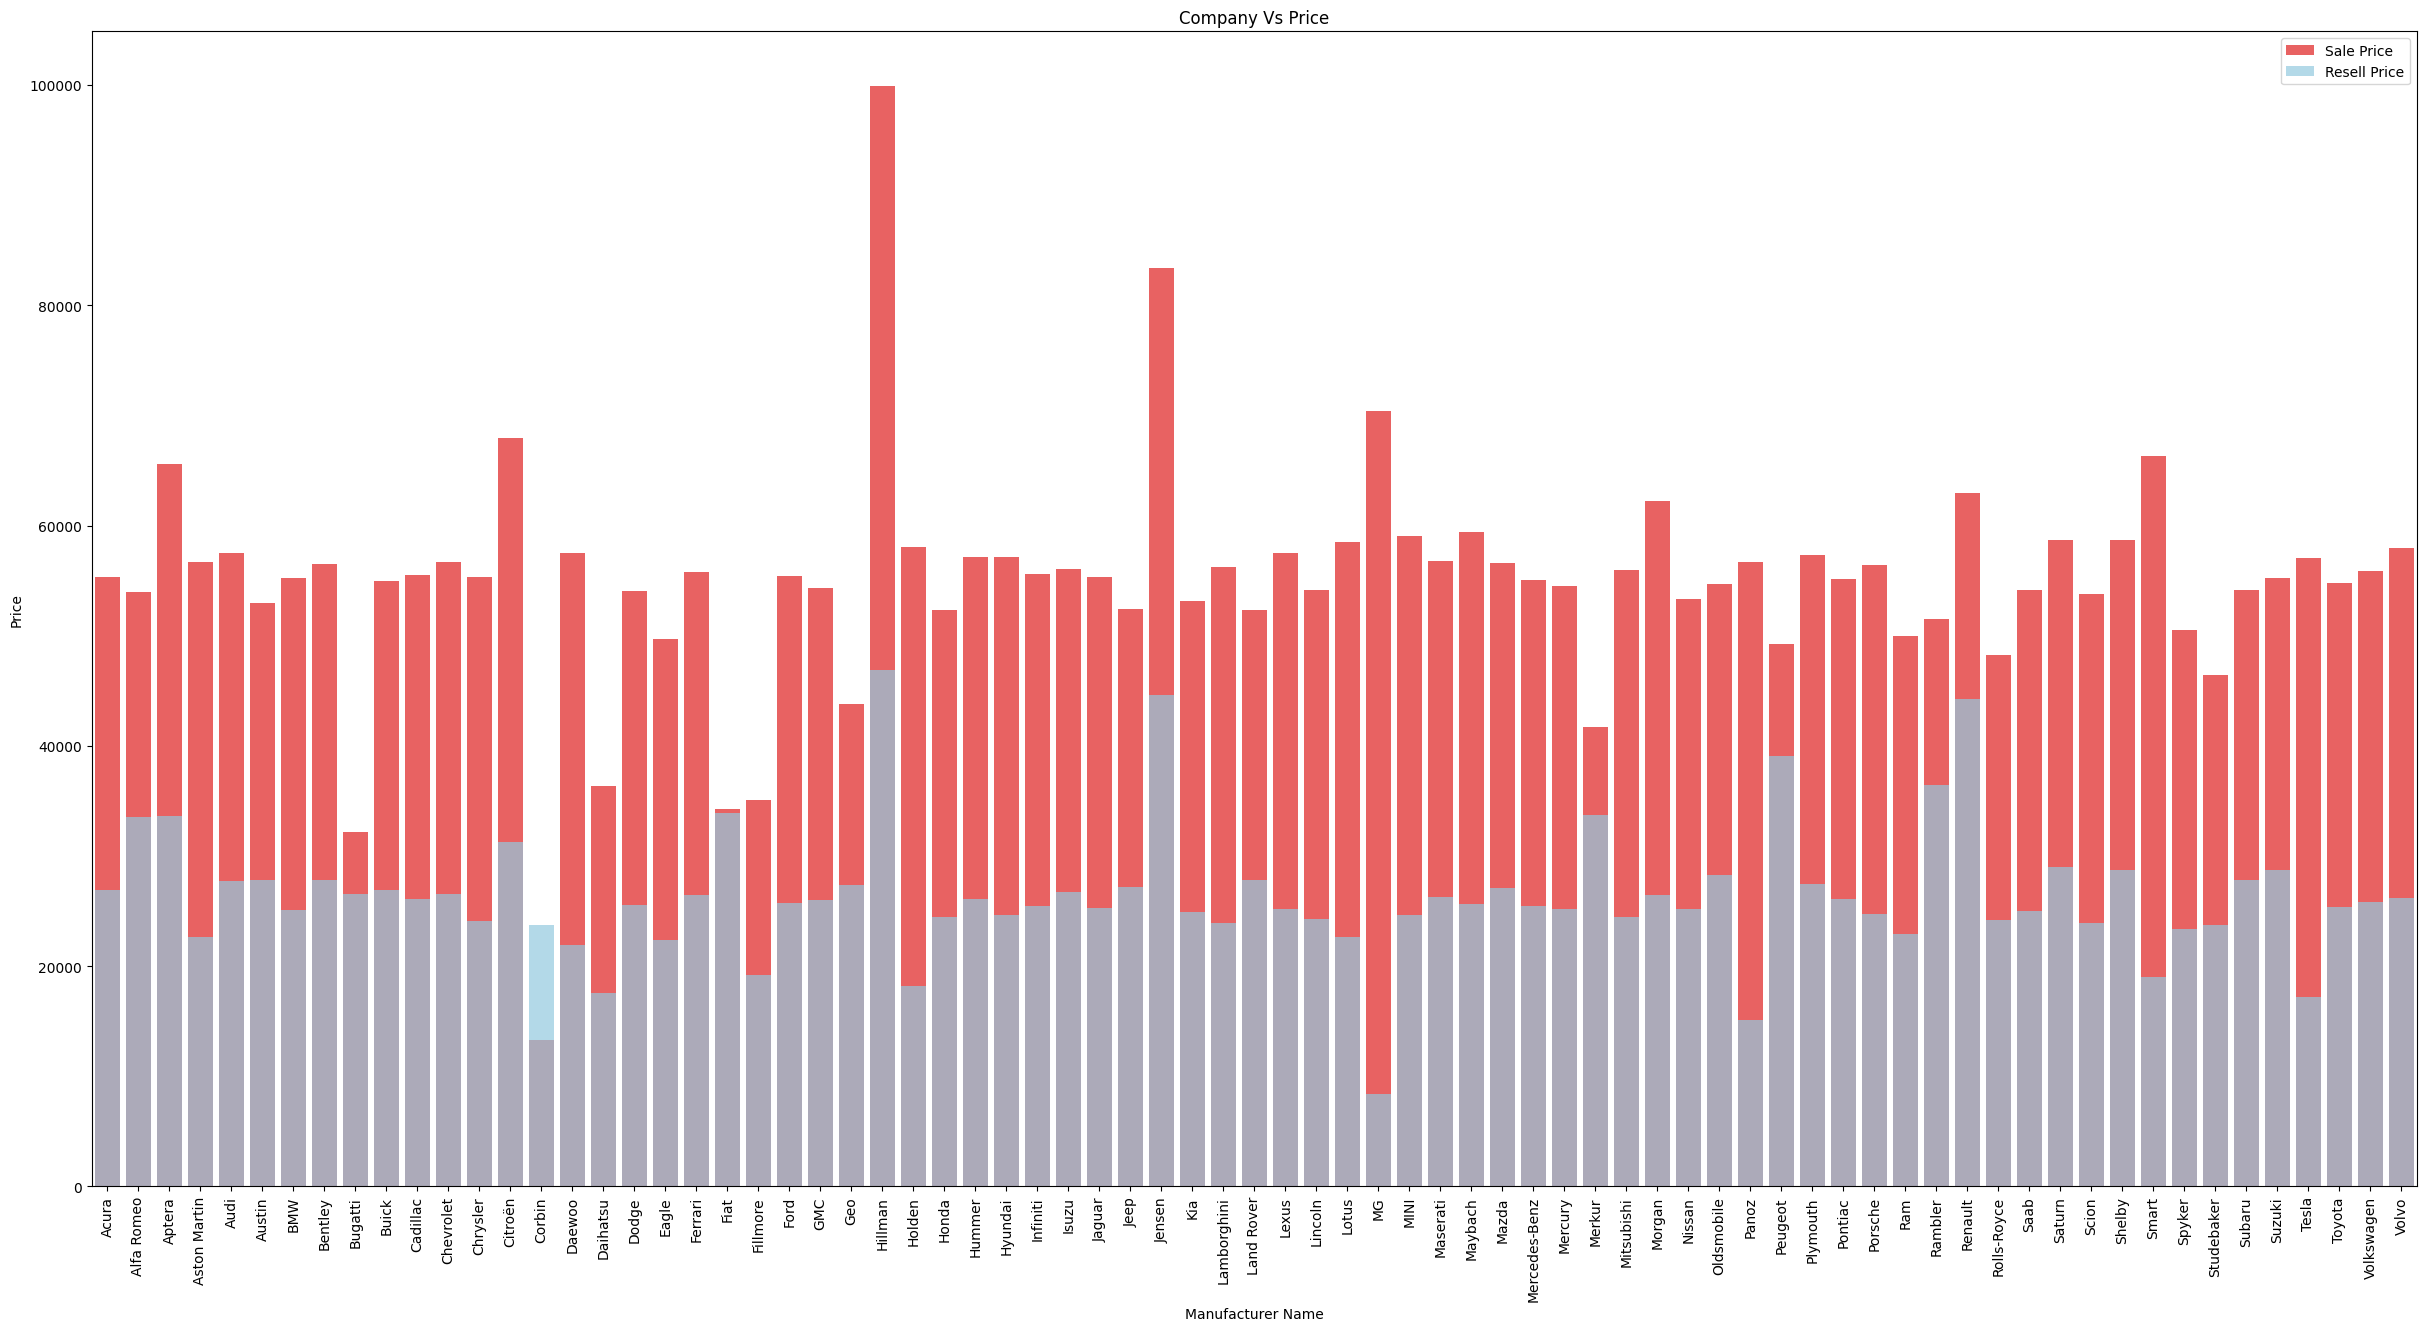

In [35]:
plt.figure(figsize=(30,15))
sns.barplot(x="Make",y="Sale Price",data=company_price,label="Sale Price",alpha=.7,color="red")
sns.barplot(x="Make",y="Resell Price",data=company_price,label="Resell Price",alpha=0.7,color="skyblue")
plt.xlabel("Manufacturer Name")
plt.ylabel("Price")
plt.title("Company Vs Price")
plt.legend()
plt.xticks(rotation=90)
plt.show()

##### Top five company that has the highest Sale Price

In [36]:
top_five_com=company_price.sort_values(by="Sale Price",ascending=False).head(5)
top_five_com

,Make,Resell Price,Sale Price
25,Hillman,46868.520000,99857.730000
34,Jensen,44581.430000,83364.310000
41,MG,8378.720000,70360.360000
13,Citroën,31239.267500,67970.053750
66,Smart,18996.023333,66283.393333


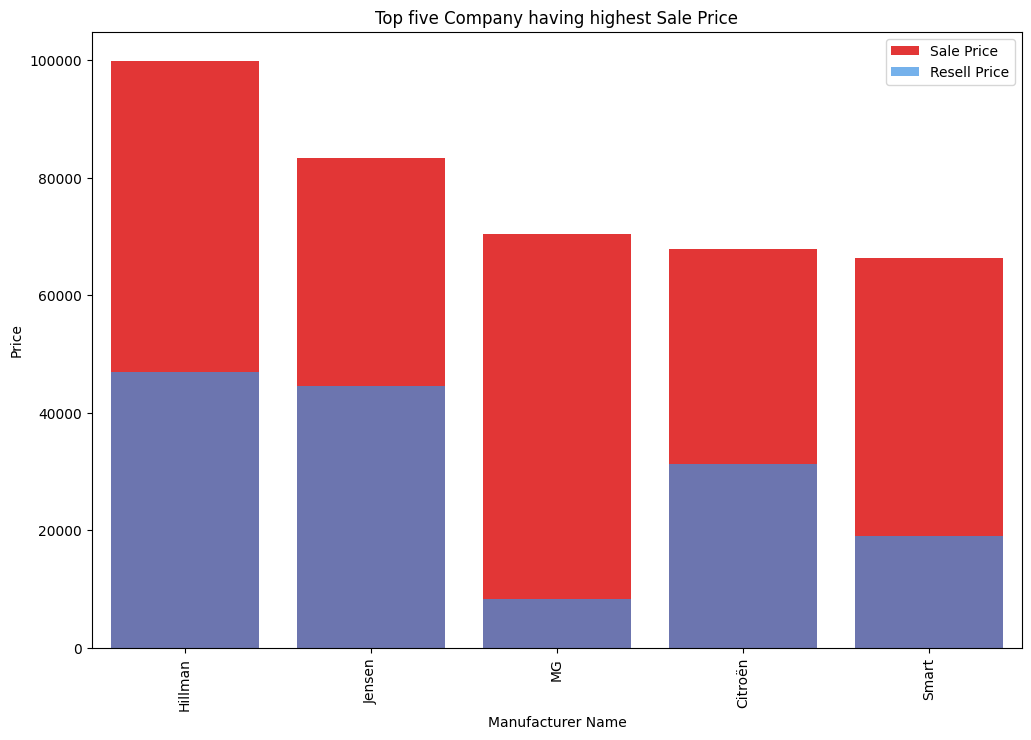

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(x="Make",y="Sale Price",data=top_five_com, label="Sale Price",color="red",alpha=0.9)
sns.barplot(x="Make",y="Resell Price",data=top_five_com,label="Resell Price",color="dodgerblue",alpha=0.7)
plt.xlabel("Manufacturer Name")
plt.ylabel("Price")
plt.title("Top five Company having highest Sale Price")
plt.legend()
plt.xticks(rotation=90)
plt.show()

##### Top five company that has the highest Resell Price

In [38]:
top_com_resell_price=company_price.sort_values(by="Resell Price",ascending=False).head(5)
top_com_resell_price

,Make,Resell Price,Sale Price
25,Hillman,46868.52,99857.730
34,Jensen,44581.43,83364.310
60,Renault,44274.07,62964.690
54,Peugeot,39062.11,49205.575
59,Rambler,36467.78,51479.645


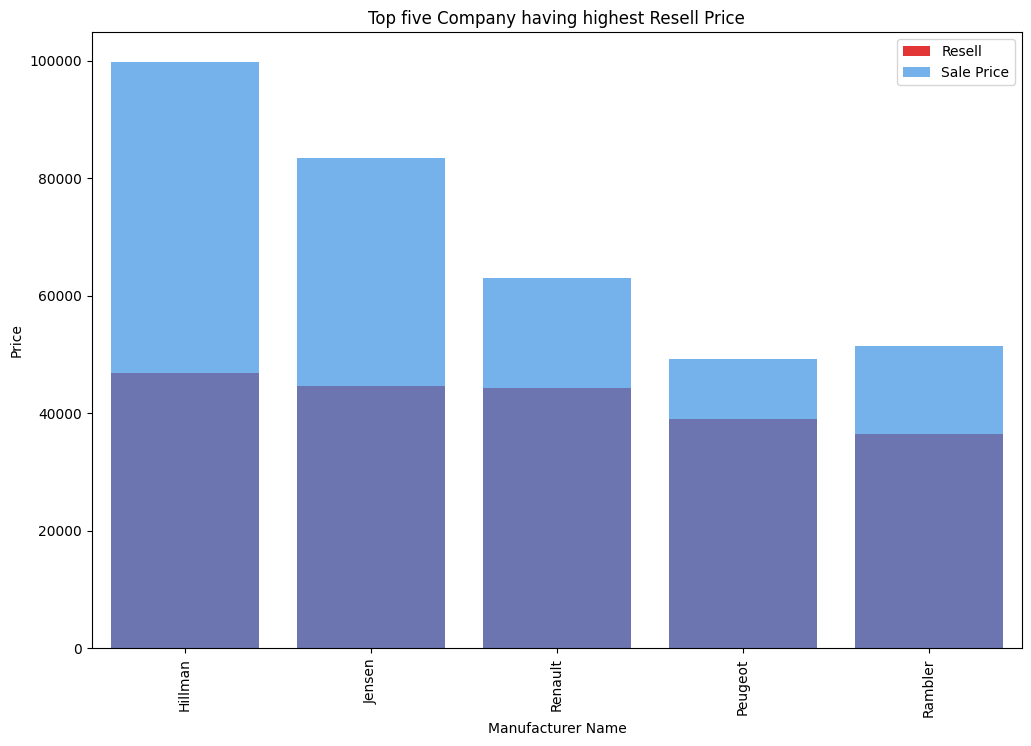

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(x="Make",y="Resell Price",data=top_com_resell_price, label="Resell",color="red",alpha=0.9)
sns.barplot(x="Make",y="Sale Price",data=top_com_resell_price,label="Sale Price",color="dodgerblue",alpha=0.7)
plt.xlabel("Manufacturer Name")
plt.ylabel("Price")
plt.title("Top five Company having highest Resell Price")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [40]:
com_higher_resell=company_price[company_price["Resell Price"]>company_price["Sale Price"]]
com_higher_resell

,Make,Resell Price,Sale Price
14,Corbin,23699.97,13270.1


* Only Corbin company has higher average Resell price than Sale price
* Hillman company has highest Sale price and Resell price

#### Realation between Top speed and time take for 0 to 60 m/h speed

<Axes: xlabel='Top Speed', ylabel='0-60 Time'>

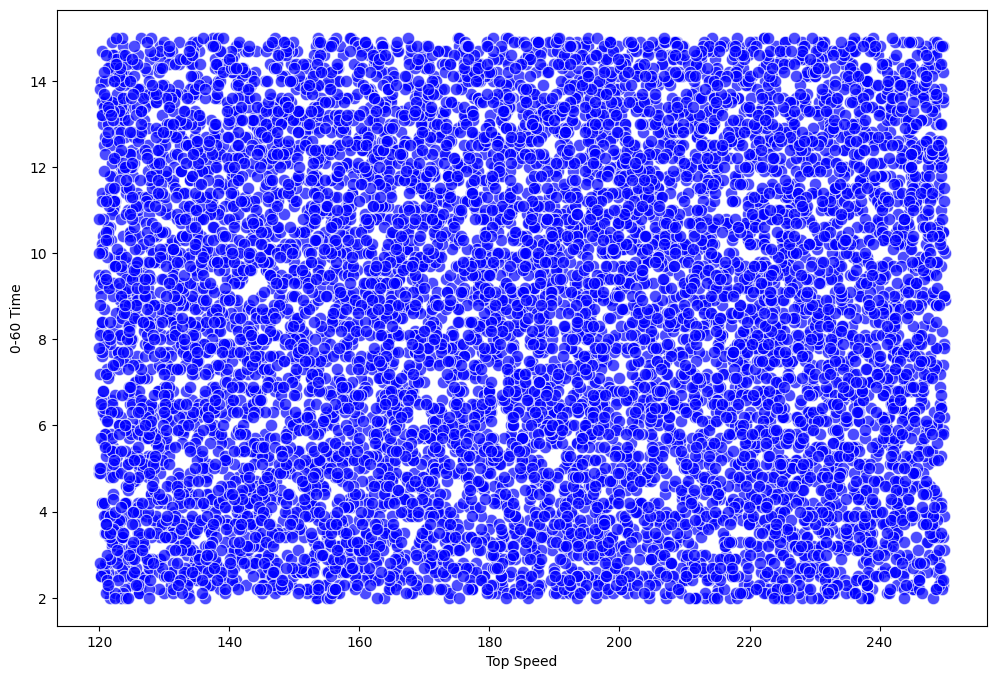

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Top Speed",y="0-60 Time", data=data,marker="o", color="blue",s=80,alpha=0.7)

In [42]:
data["Top Speed"].nunique()

1300

In [43]:
#find the averge time for into 0-60 m/h by each top speed category
speed=data.groupby("Top Speed")["0-60 Time"].mean().reset_index()
speed

,Top Speed,0-60 Time
0,120.0,8.000000
1,120.1,6.000000
2,120.2,9.933333
3,120.3,7.155556
4,120.4,10.575000
...,...,...
1295,249.6,9.660000
1296,249.7,8.833333
1297,249.8,9.420000
1298,249.9,7.733333


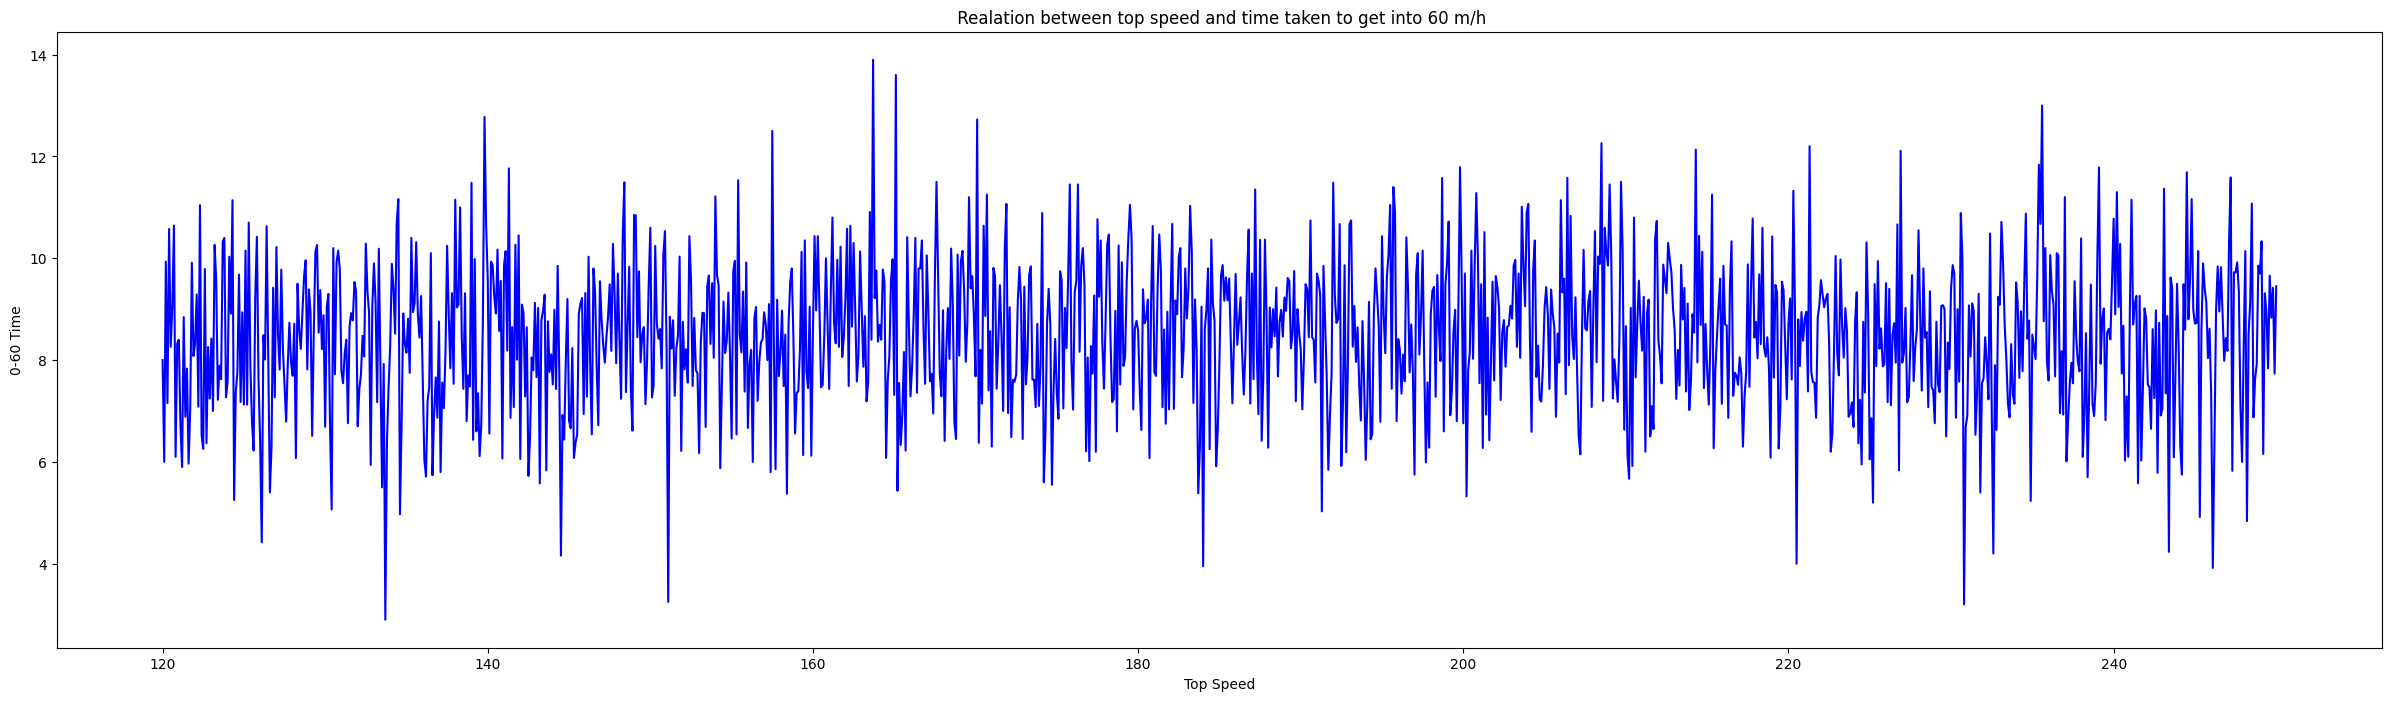

In [44]:
plt.figure(figsize=(30,8))
sns.lineplot(x="Top Speed",y="0-60 Time", data=speed, color="blue",)
plt.title(" Realation between top speed and time taken to get into 60 m/h")
plt.show()

* most of the them are taking about 6 to 10 seconds

#### Analysis on Age of car

In [45]:
# first we have to convert purchase date into age
from datetime import datetime
data["Purchase Date"]=pd.to_datetime(data["Purchase Date"],format='%d/%m/%Y')
current_date=datetime.now()
data["Age"]=((current_date-data["Purchase Date"]).dt.days / 365).astype(int)
data.head()


,Make,Model,Nickname,Car Gender,Buyer Gender,Buyer Age,Buzzword,Country,City,Dealer Latitude,...,Color,New Car,Purchase Date,Sale Price,Discount,Resell Price,5-yr Depreciation,Top Speed,0-60 Time,Age
0,Suzuki,Vitara,Philippine,Female,Female,51,User-friendly,Belgium,Antwerpen,51.247239,...,Yellow,False,2009-07-19,54806.14,0.2467,33858.32,0.13,200.9,11.5,14
1,Honda,S2000,Henrik,Male,Male,30,analyzing,China,Jinhu,33.025433,...,Crimson,False,2015-10-26,51826.30,0.3147,2989.28,0.02,158.5,8.8,8
2,BMW,Z4,Lebbie,Male,Female,54,software,China,Gemo,30.916207,...,Khaki,False,2010-03-28,82929.14,0.5414,35049.16,0.24,149.5,14.4,13
3,Toyota,Tacoma,Jefferey,Female,Male,68,monitoring,Portugal,Queluz de Baixo,38.745168,...,Puce,False,2008-05-07,56928.66,0.0850,8236.15,0.20,153.3,11.5,15
4,Ford,Festiva,Glendon,Female,Male,70,Sharable,Latvia,Jaunpils,56.729980,...,Yellow,False,2008-06-01,77201.26,0.1642,32765.76,0.18,122.0,14.9,15


In [46]:
data['Age'] = data['Age'].astype('int64')

In [47]:
data.dtypes

Make                         object
Model                        object
Nickname                     object
Car Gender                   object
Buyer Gender                 object
Buyer Age                     int64
Buzzword                     object
Country                      object
City                         object
Dealer Latitude             float64
Dealer Longitude            float64
Color                        object
New Car                        bool
Purchase Date        datetime64[ns]
Sale Price                  float64
Discount                    float64
Resell Price                float64
5-yr Depreciation           float64
Top Speed                   float64
0-60 Time                   float64
Age                           int64
dtype: object

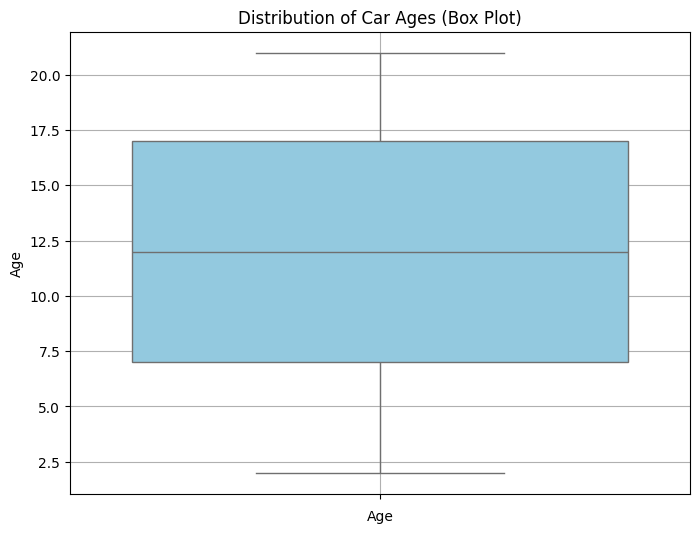

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['Age'], color='skyblue')
plt.xlabel('Age')
plt.title('Distribution of Car Ages (Box Plot)')
plt.grid(True)
plt.show()

In [49]:
data["Age"].max()

21

In [50]:
data["Age"].min()

2

* Ther is no outlier in Age of car
* maximum of age is 21 and minimum of age is 2

#### Anlysis on Age and 5-yr Depreciation

In [51]:
depreciation=data.groupby("Age")["5-yr Depreciation"].mean().reset_index()
depreciation

,Age,5-yr Depreciation
0,2,0.128571
1,3,0.128463
2,4,0.129174
3,5,0.131015
4,6,0.132235
5,7,0.133780
6,8,0.133702
7,9,0.130416
8,10,0.125481
9,11,0.128831


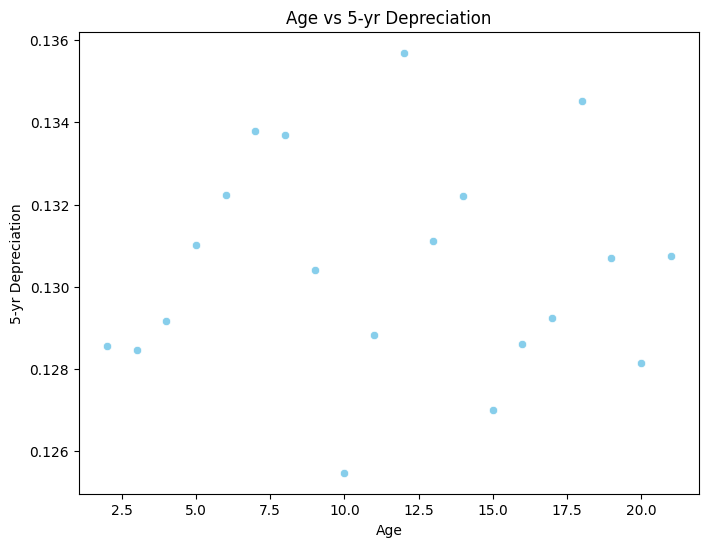

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='5-yr Depreciation', data=depreciation, color='skyblue', marker='o')
plt.xlabel('Age')
plt.ylabel('5-yr Depreciation')
plt.title('Age vs 5-yr Depreciation')
plt.show()

* There is no specific realtion we can find out

### PREPROCESSING

#### Handling missing values

In [53]:
data.isna().sum()

Make                 0
Model                0
Nickname             0
Car Gender           0
Buyer Gender         0
Buyer Age            0
Buzzword             0
Country              0
City                 0
Dealer Latitude      0
Dealer Longitude     0
Color                0
New Car              0
Purchase Date        0
Sale Price           0
Discount             0
Resell Price         0
5-yr Depreciation    0
Top Speed            0
0-60 Time            0
Age                  0
dtype: int64

* There is no missing values present

#### Outlier checking

In [54]:
data.dtypes

Make                         object
Model                        object
Nickname                     object
Car Gender                   object
Buyer Gender                 object
Buyer Age                     int64
Buzzword                     object
Country                      object
City                         object
Dealer Latitude             float64
Dealer Longitude            float64
Color                        object
New Car                        bool
Purchase Date        datetime64[ns]
Sale Price                  float64
Discount                    float64
Resell Price                float64
5-yr Depreciation           float64
Top Speed                   float64
0-60 Time                   float64
Age                           int64
dtype: object

In [55]:
data.columns

Index(['Make', 'Model', 'Nickname', 'Car Gender', 'Buyer Gender', 'Buyer Age',
       'Buzzword', 'Country', 'City', 'Dealer Latitude', 'Dealer Longitude',
       'Color', 'New Car', 'Purchase Date', 'Sale Price', 'Discount',
       'Resell Price', '5-yr Depreciation', 'Top Speed', '0-60 Time', 'Age'],
      dtype='object')

In [56]:
numcols=data.dtypes[(data.dtypes=="int64") | (data.dtypes=="float64")].index
numcols

Index(['Buyer Age', 'Dealer Latitude', 'Dealer Longitude', 'Sale Price',
       'Discount', 'Resell Price', '5-yr Depreciation', 'Top Speed',
       '0-60 Time', 'Age'],
      dtype='object')

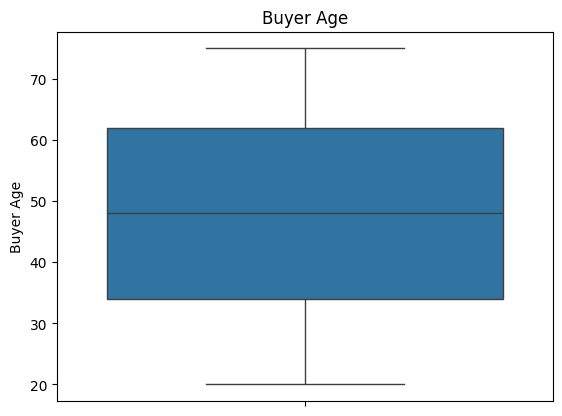

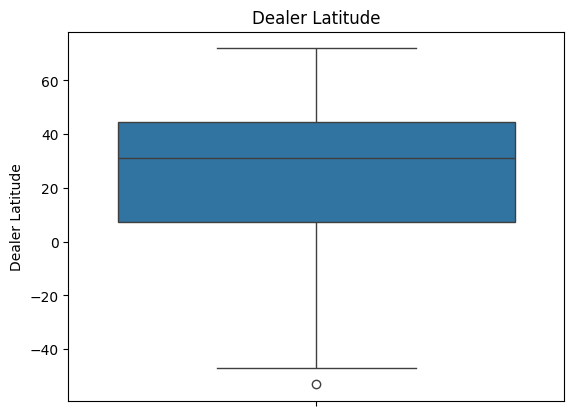

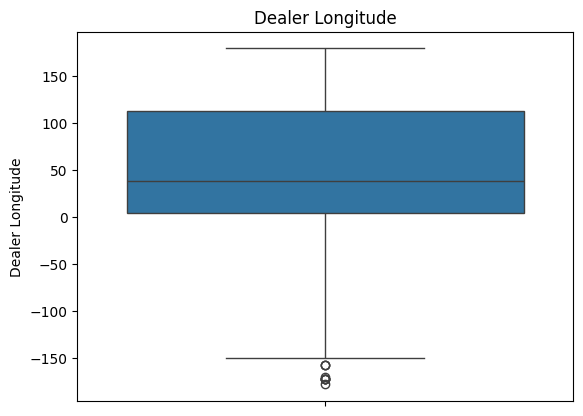

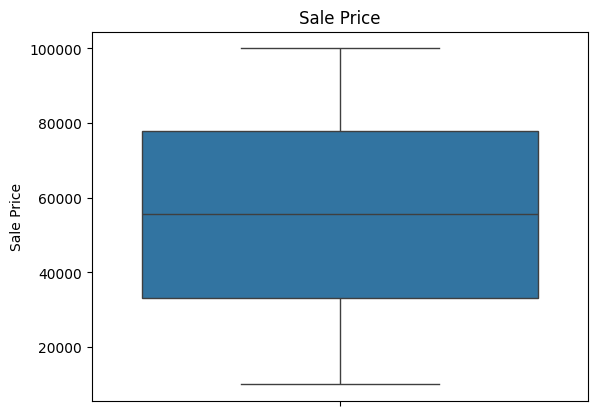

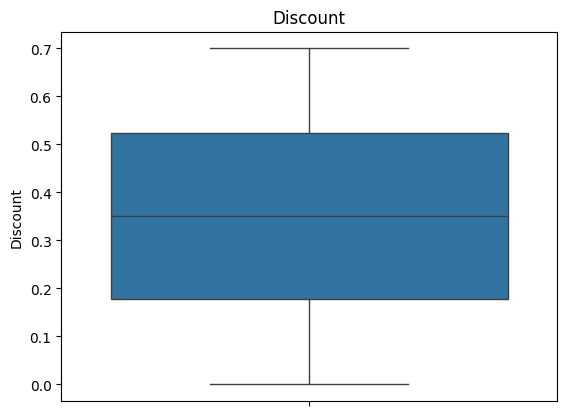

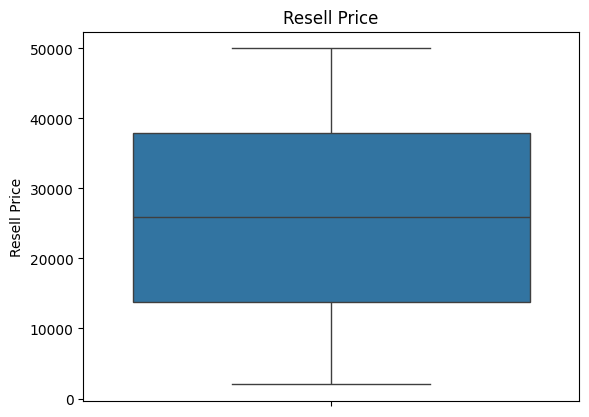

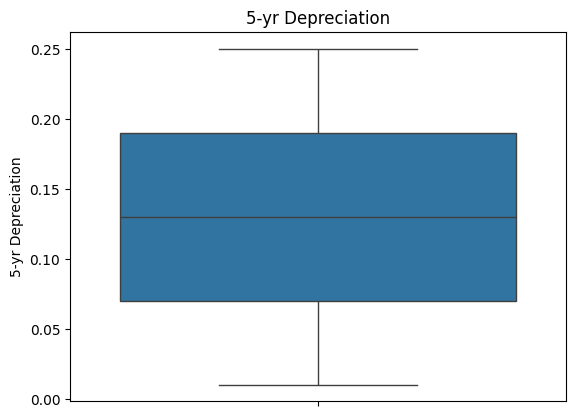

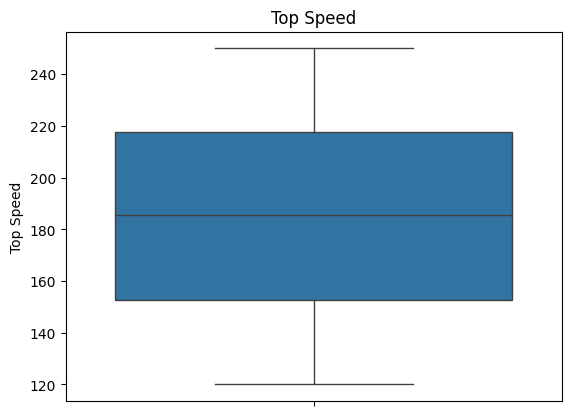

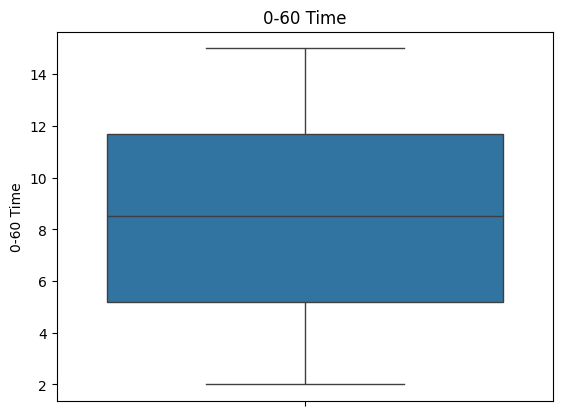

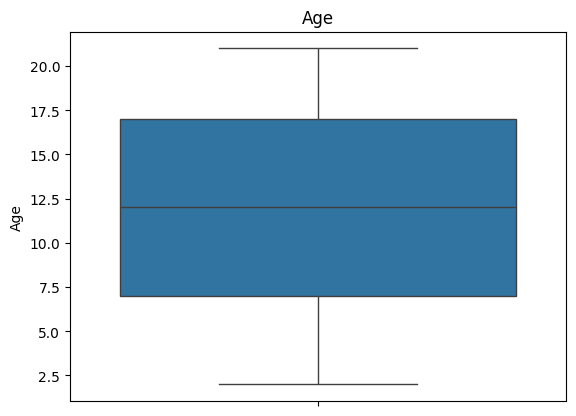

In [57]:
# Outlier checking
for col in numcols:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

* Only Dealer Latitude and Dealer Longitude has outliers

In [58]:
# handling the out liers
olcol=['Dealer Latitude', 'Dealer Longitude']
for x in olcol:
    desc=data[x].describe()
    IQR=desc["75%"]-desc["25%"]
    lower_bound=desc["25%"]-1.5*IQR
    upper_bound=desc["75%"]+1.5*IQR
    data.loc[data[x]>upper_bound,x]=upper_bound
    data.loc[data[x]<lower_bound,x]=lower_bound

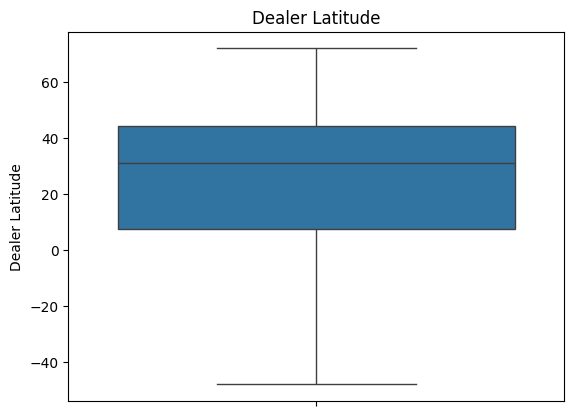

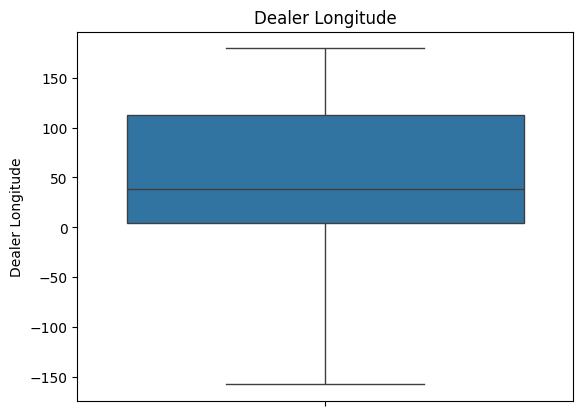

In [59]:
for col in olcol:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

* Now outliers handled

#### Feature selection and Feature Scaling

In [60]:
# We can remove Purchased Date column because we have Age column
data=data.drop("Purchase Date",axis=1)

In [61]:
# New Car is boolean type 
data["New Car"]=data["New Car"].astype(int)

In [62]:
# there are some categorical column so we have to encode that
catcol=data.dtypes[data.dtypes=="object"].index
catcol

Index(['Make', 'Model', 'Nickname', 'Car Gender', 'Buyer Gender', 'Buzzword',
       'Country', 'City', 'Color'],
      dtype='object')

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in catcol:
    data[col]=le.fit_transform(data[col])

In [64]:
data.head(10)

,Make,Model,Nickname,Car Gender,Buyer Gender,Buyer Age,Buzzword,Country,City,Dealer Latitude,Dealer Longitude,Color,New Car,Sale Price,Discount,Resell Price,5-yr Depreciation,Top Speed,0-60 Time,Age
0,70,897,4398,0,0,51,103,16,258,51.247239,4.440346,18,0,54806.14,0.2467,33858.32,0.13,200.9,11.5,14
1,27,715,2510,1,1,30,115,36,3033,33.025433,119.020584,2,0,51826.30,0.3147,2989.28,0.02,158.5,8.8,8
2,6,938,3295,1,0,54,270,36,2264,30.916207,121.677640,7,0,82929.14,0.5414,35049.16,0.24,149.5,14.4,13
3,72,823,2800,0,1,68,232,146,5733,38.745168,-9.267087,12,0,56928.66,0.0850,8236.15,0.20,153.3,11.5,15
4,22,374,2284,0,1,70,89,98,2927,56.729980,23.016588,18,0,77201.26,0.1642,32765.76,0.18,122.0,14.9,15
5,9,778,2280,1,0,70,106,116,2392,25.677560,-100.259693,2,0,50882.23,0.6913,38576.59,0.16,182.7,9.6,16
6,30,636,820,1,1,66,289,89,2347,37.752524,139.165056,3,1,69680.54,0.1657,27962.25,0.18,231.8,5.3,6
7,58,168,2187,0,1,37,136,150,2872,57.708244,27.860883,0,1,56393.91,0.1006,29157.95,0.14,144.1,4.7,15
8,23,743,3674,0,1,43,131,105,2018,49.997540,5.947564,9,1,13797.81,0.2126,31062.38,0.01,223.3,5.8,20
9,51,118,5469,1,0,73,43,43,4415,34.858265,33.600789,12,1,15176.04,0.1922,45892.79,0.12,170.4,4.1,4


In [65]:
cor=data.corr()
cor

,Make,Model,Nickname,Car Gender,Buyer Gender,Buyer Age,Buzzword,Country,City,Dealer Latitude,Dealer Longitude,Color,New Car,Sale Price,Discount,Resell Price,5-yr Depreciation,Top Speed,0-60 Time,Age
Make,1.000000,0.032864,-0.014952,-0.013948,-0.006467,-0.018811,0.002549,-0.002909,-0.005128,-0.000758,0.005932,-0.020390,0.005771,-0.002779,-0.009273,-0.000357,-0.022869,0.017111,0.002343,-0.004698
Model,0.032864,1.000000,0.014613,-0.005190,0.015962,0.004718,0.008269,0.006905,0.005133,-0.005367,-0.009432,-0.001196,-0.001039,0.006140,-0.005965,0.005706,-0.010939,0.016182,-0.009209,-0.002098
Nickname,-0.014952,0.014613,1.000000,0.015983,0.050793,0.013056,0.011849,0.020661,0.008959,0.006023,-0.010811,0.002625,-0.003529,-0.001495,-0.000578,0.021314,-0.004858,-0.000731,-0.007382,0.004940
Car Gender,-0.013948,-0.005190,0.015983,1.000000,-0.019074,-0.012899,0.007663,0.000085,-0.005606,0.021824,0.000070,-0.016689,0.001308,-0.002461,0.000236,0.010196,0.009861,0.017099,0.006322,-0.000925
Buyer Gender,-0.006467,0.015962,0.050793,-0.019074,1.000000,0.005046,0.010394,0.004033,-0.000614,0.004870,0.001850,-0.002038,-0.007241,-0.011055,0.008897,0.002445,-0.021783,0.009639,-0.000379,0.017109
Buyer Age,-0.018811,0.004718,0.013056,-0.012899,0.005046,1.000000,0.001899,0.016496,-0.010810,0.011219,-0.010472,0.019728,0.002117,-0.001766,0.000517,0.000557,0.010262,-0.017520,-0.008878,-0.009991
Buzzword,0.002549,0.008269,0.011849,0.007663,0.010394,0.001899,1.000000,0.012106,-0.008168,-0.001284,-0.009887,0.012081,0.004057,-0.005013,-0.006451,0.028124,-0.005691,-0.024184,0.004674,-0.010085
Country,-0.002909,0.006905,0.020661,0.000085,0.004033,0.016496,0.012106,1.000000,0.010938,0.192597,-0.097878,0.012515,-0.005332,-0.004106,0.002312,0.007662,0.003653,-0.001353,0.007350,0.016957
City,-0.005128,0.005133,0.008959,-0.005606,-0.000614,-0.010810,-0.008168,0.010938,1.000000,0.075700,0.083717,0.002480,-0.005619,-0.004478,0.012448,0.014233,0.012455,-0.012923,-0.011578,-0.006853
Dealer Latitude,-0.000758,-0.005367,0.006023,0.021824,0.004870,0.011219,-0.001284,0.192597,0.075700,1.000000,0.018872,0.006161,-0.004531,-0.012770,-0.006938,-0.003827,0.005242,-0.003885,0.016251,0.014731


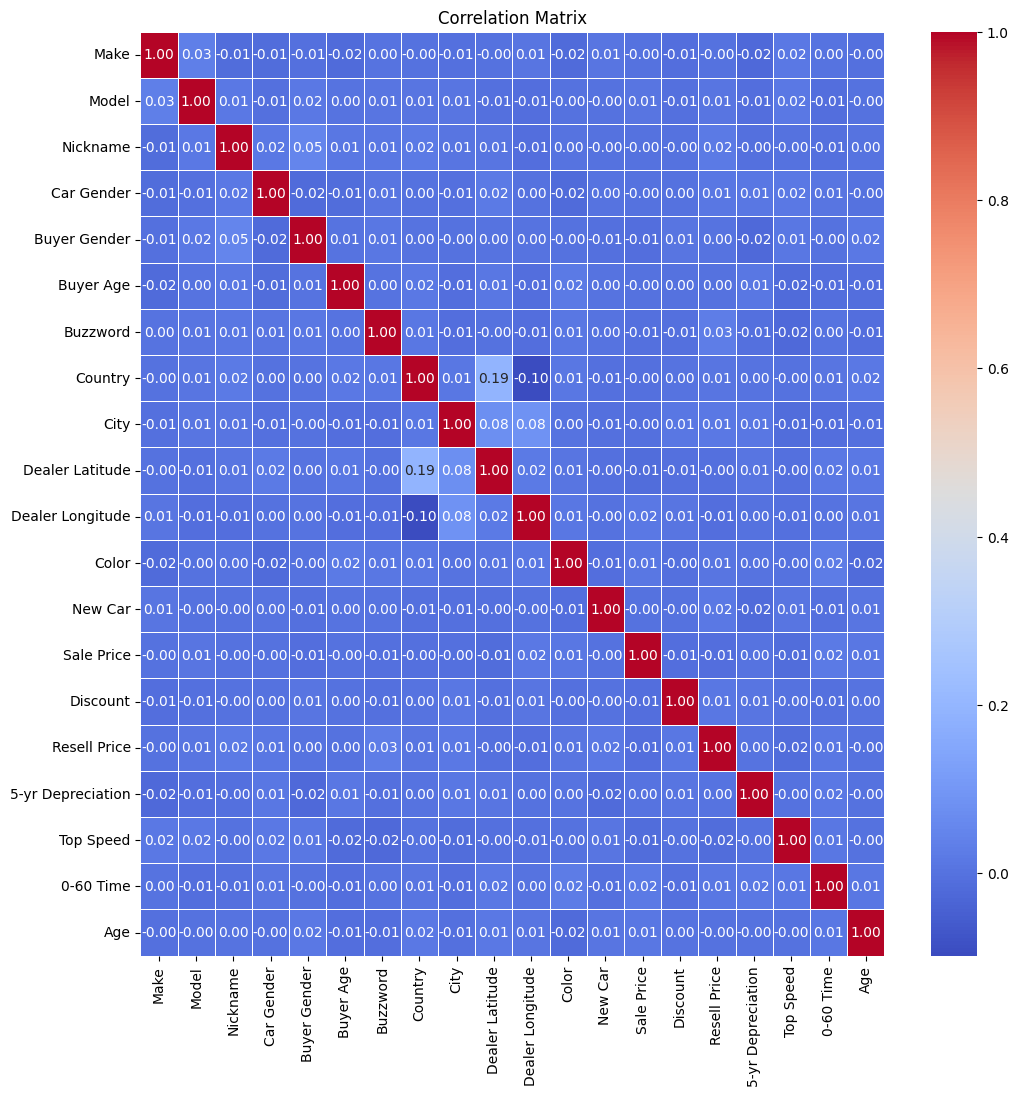

In [66]:
plt.figure(figsize=(12,12))
sns.heatmap(data=cor,annot=True,cmap="coolwarm",fmt=".2f",linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

* From this correaltion map we can under stand that there is no that much realtion between features

In [67]:
# we can remove some column because that has no suffient role in our analysis
data=data.drop(['Buyer Gender', 'Buyer Age','Dealer Latitude', 'Dealer Longitude','5-yr Depreciation'],axis=1)

In [68]:
X=data.drop("Resell Price",axis=1)
y=data["Resell Price"]

In [69]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [71]:
X_train

array([[-1.15850501, -0.73427344, -0.55497774, ..., -0.19495042,
         0.72882451,  1.48189464],
       [ 1.24498441, -1.49937324, -0.93591858, ...,  0.59032278,
        -0.52780404, -0.52881722],
       [ 0.1356816 , -0.0897805 ,  0.540076  , ...,  1.56256579,
         0.48819351,  0.01955874],
       ...,
       [-0.234086  , -0.09731843,  1.29409699, ...,  1.40230596,
        -0.18022593, -0.16323324],
       [-1.11228406, -1.23931468,  1.61154768, ...,  1.35957   ,
         0.80903484, -0.16323324],
       [-0.83495836,  0.40395385, -0.17766491, ...,  1.05774731,
         0.35450962, -1.62556914]])

In [72]:
X_test

array([[-1.20472596,  0.05344015,  0.71240638, ...,  0.58498079,
        -1.3031706 ,  0.5679347 ],
       [-0.18786505, -1.36369051,  0.38649033, ..., -0.14954346,
        -1.70422226, -0.34602523],
       [ 1.70719392, -0.89256995,  0.10592438, ...,  1.30347906,
        -1.16948671, -0.16323324],
       ...,
       [ 0.55167015, -0.17269772, -1.27029998, ..., -0.47273413,
         1.58440139,  0.93351868],
       [ 1.70719392, -1.0885561 ,  1.18707075, ...,  0.42472095,
        -1.0625396 , -1.62556914],
       [ 0.4130073 , -1.5559077 , -0.80772896, ...,  0.376643  ,
        -0.8219086 , -1.44277716]])

#### Modelling

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [74]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [75]:
lr=LinearRegression()
lr.fit(X_train_poly,y_train)

LinearRegression()

In [76]:
y_pred=lr.predict(X_test_poly)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean absolute error: ",mae)
print("r2 Score: ",r2)

Mean absolute error:  11849.415315000002
r2 Score:  -0.003640398599654482


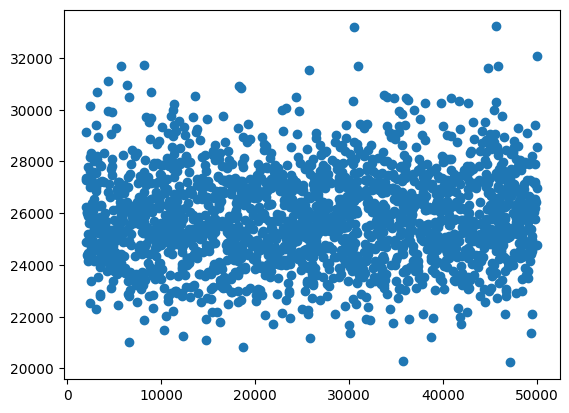

In [77]:
plt.scatter(y_test,y_pred)

In [78]:
# Desision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [79]:
dtr=DecisionTreeRegressor()

In [80]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [81]:
y_pred=dtr.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean absolute error: ",mae)
print("r2 Score: ",r2)

Mean absolute error:  15961.47302
r2 Score:  -1.0413393011795962


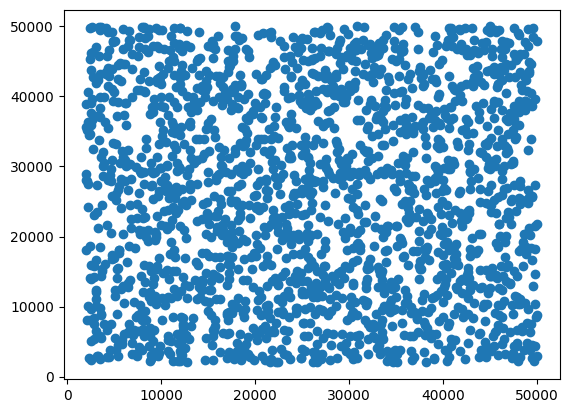

In [82]:
plt.scatter(y_test,y_pred)

In [83]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [87]:
rfr=RandomForestRegressor(n_estimators=100, random_state=42)

In [88]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [89]:
y_pred=dtr.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean absolute error: ",mae)
print("r2 Score: ",r2)

Mean absolute error:  15961.47302
r2 Score:  -1.0413393011795962


In [92]:
# KNeighboursRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

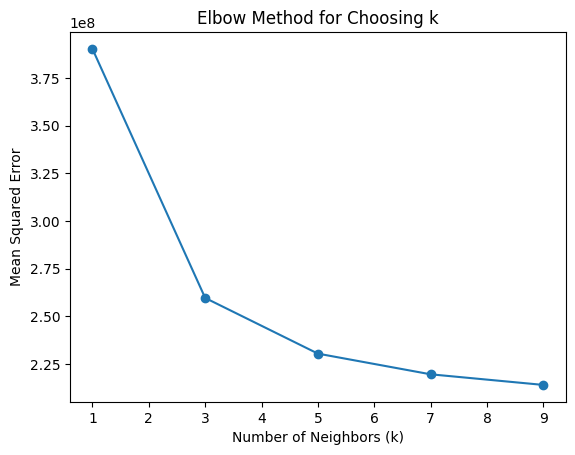

In [93]:
# Calculate mean squared error for different k values
k_values = [1, 3, 5, 7, 9]
mse_values = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    mse = -cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    mse_values.append(mse)

# Plot the MSE values for different k values
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('Elbow Method for Choosing k')
plt.show()


In [95]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [96]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [97]:
y_pred = knn_model.predict(X_test)

In [101]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2=r2_score(y_test,y_pred)
print("r2 Score: ",r2)

Mean Squared Error: 228098336.41475987
r2 Score:  -0.19696469850026288
